# **Tarea 5**

# 1. Importar Bibliotecas para Ciencia de Datos <a id="2"></a>

Instalar bibliotecas.

In [1]:
# Instalar bibliotecas específicas para trabajar en el laboratorio

#!pip install numpy
#!pip install pandas
#!pip install matplotlib
!pip install scipy
!pip install sklearn


[notice] A new release of pip available: 22.1.2 -> 22.2.1
[notice] To update, run: C:\Users\56981\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.1.2 -> 22.2.1
[notice] To update, run: C:\Users\56981\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Importar los paquetes de procesamiento y visualización de datos.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
%matplotlib inline

# 2. K-Vecinos más Cercanos <a id="4"></a>

## Leer el Conjunto de Datos

Suponga que un proveedor de telecomunicaciones ha segmentado su base de clientes por patrones de uso del servicio, clasificando a los clientes en cuatro grupos. Si los datos demográficos se pueden utilizar para predecir la pertenencia a un grupo, la empresa podría personalizar las ofertas para potenciales clientes de manera individual. Así, esto sería un problema de clasificación. Es decir, dado el conjunto de datos, con etiquetas predefinidas, se necesita construir un modelo para predecir la clase de un caso nuevo o desconocido.

El ejemplo que se va a realizar se centra en el uso de datos demográficos, como la región, la edad y el estado civil, para predecir patrones de uso.

El campo de destino, llamado `custcat`, tiene cuatro valores posibles que corresponden a los cuatro grupos de clientes, de la siguiente manera:
1. Servicio Básico
2. Servicio Electrónico
3. Servicio Plus
4. Servicio Total

El objetivo es construir un clasificador, para predecir la clase de casos desconocidos. Para ello, se usará el tipo de clasificación específico llamado **K-Vecino más Cercano**.

Cargar los datos y guardarlos en el dataframe `df2`:

In [3]:
# ruta de datos y leer los datos

path2='winequality(limpio).csv'
df2 = pd.read_csv(path2)
df2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality,density-kg/m^3,quality classification,Red,White
0,7.4,0.70,0.00,1.9,0.076,11.0,0.064516,3.51,0.56,9.4,5,997.8,Mala,1,0
1,7.8,0.88,0.00,2.6,0.098,25.0,0.140553,3.20,0.68,9.8,5,996.8,Mala,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,0.110599,3.26,0.65,9.8,5,997.0,Mala,1,0
3,11.2,0.28,0.56,1.9,0.075,17.0,0.124424,3.16,0.58,9.8,6,998.0,Media,1,0
4,7.4,0.70,0.00,1.9,0.076,11.0,0.064516,3.51,0.56,9.4,5,997.8,Mala,1,0


## Pre-procesamiento de los Datos

In [4]:
df2['fixed acidity'].value_counts()

6.8     354
6.6     327
6.4     305
7.0     282
6.9     279
       ... 
14.0      1
14.3      1
13.8      1
13.5      1
3.9       1
Name: fixed acidity, Length: 106, dtype: int64

array([[<AxesSubplot:title={'center':'sulphates'}>]], dtype=object)

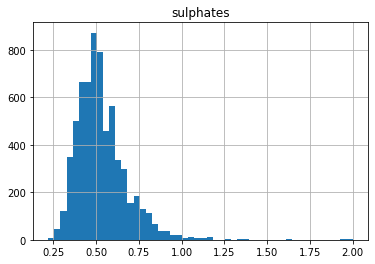

In [45]:
df2.hist(column='sulphates', bins=50)

Un paso importante es definir las variable **X** e **y** y que atributos o características la van a componer. Para ello se procede a visualizar las columnas del conjunto de datos.

In [46]:
df2.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH',
       'sulphates', 'alcohol', 'quality', 'density-kg/m^3',
       'quality classification', 'Red', 'White'],
      dtype='object')

Para crear la variable `X2` se debe convertir el dataframe de *Pandas* a un arreglo *Numpy* para que la biblioteca *scikit-learn* pueda trabajar sin problemas. Aquí se elimina la columna que se usará como variable de respuesta o dependiente.

In [47]:
X2 = df2[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH', 'sulphates', 'alcohol', 'quality', 'density-kg/m^3']].values  #.astype(float)
X2[0:5]


array([[7.40000000e+00, 7.00000000e-01, 0.00000000e+00, 1.90000000e+00,
        7.60000000e-02, 1.10000000e+01, 6.45161290e-02, 3.51000000e+00,
        5.60000000e-01, 9.40000000e+00, 5.00000000e+00, 9.97800000e+02],
       [7.80000000e+00, 8.80000000e-01, 0.00000000e+00, 2.60000000e+00,
        9.80000000e-02, 2.50000000e+01, 1.40552995e-01, 3.20000000e+00,
        6.80000000e-01, 9.80000000e+00, 5.00000000e+00, 9.96800000e+02],
       [7.80000000e+00, 7.60000000e-01, 4.00000000e-02, 2.30000000e+00,
        9.20000000e-02, 1.50000000e+01, 1.10599078e-01, 3.26000000e+00,
        6.50000000e-01, 9.80000000e+00, 5.00000000e+00, 9.97000000e+02],
       [1.12000000e+01, 2.80000000e-01, 5.60000000e-01, 1.90000000e+00,
        7.50000000e-02, 1.70000000e+01, 1.24423963e-01, 3.16000000e+00,
        5.80000000e-01, 9.80000000e+00, 6.00000000e+00, 9.98000000e+02],
       [7.40000000e+00, 7.00000000e-01, 0.00000000e+00, 1.90000000e+00,
        7.60000000e-02, 1.10000000e+01, 6.45161290e-02, 3.51

Realizar el mismo procedimiento para crear la variable `y2` con el atributo o variable dependiente `custcat` que contiene el valor de las etiquetas.


In [9]:
y2 = df2['fixed acidity'].values
y2[0:5]

array([ 7.4,  7.8,  7.8, 11.2,  7.4])

El último paso del pre-procesamiento de los datos de entrada consiste **Normalizar los Datos**. La estandarización de datos proporciona datos con media cero y varianza unitaria, es una buena práctica, especialmente para algoritmos como *K-Vecino más Cercano*, que se basa en la distancia de los casos de clasificación.

In [10]:
X2 = preprocessing.StandardScaler().fit_transform(X2)
X2[0:5]

array([[ 0.14247327,  2.18883292, -2.19283252, -0.74430832,  0.56995782,
        -1.10013986, -1.44635852,  1.81308951,  0.19309677, -0.91586103,
        -0.93722961,  1.16120776],
       [ 0.45103572,  3.28223494, -2.19283252, -0.59592644,  1.1979747 ,
        -0.31132009, -0.86246863, -0.11507303,  0.99957862, -0.57949859,
        -0.93722961,  0.80282639],
       [ 0.45103572,  2.55330026, -1.91755268, -0.65951867,  1.02669737,
        -0.87476278, -1.09248586,  0.25811972,  0.79795816, -0.57949859,
        -0.93722961,  0.87450266],
       [ 3.07381662, -0.36243847,  1.66108525, -0.74430832,  0.54141159,
        -0.76207424, -0.98632406, -0.3638682 ,  0.32751041, -0.57949859,
         0.20799905,  1.23288404],
       [ 0.14247327,  2.18883292, -2.19283252, -0.74430832,  0.56995782,
        -1.10013986, -1.44635852,  1.81308951,  0.19309677, -0.91586103,
        -0.93722961,  1.16120776]])

In [11]:
X2_entrena, X2_prueba, y2_entrena, y2_prueba = train_test_split( X2, y2, test_size=0.2, random_state=4)
print ('Conjunto de Entrenamiento set:', X2_entrena.shape,  y2_entrena.shape)
print ('Conjunto de Prueba:', X2_prueba.shape,  y2_prueba.shape)

Conjunto de Entrenamiento set: (5197, 12) (5197,)
Conjunto de Prueba: (1300, 12) (1300,)


## Modelado

Primero que nada, hay que importar y cargar el módulo `neighbors` que habilita el clasificador que implementa el modelo del K-Vecinos más Cercano.

In [12]:
from sklearn.neighbors import KNeighborsClassifier

A continuación se procede a crear una instancia del modelo para posteriormente entrenar el modelo con los conjuntos de datos de entrenamiento. Inicialmente se procederá al entrenamiento del algoritmo con k=4.

In [48]:
k = 4

# Crear y entrenar el modelo y pronosticar  
vecino = KNeighborsClassifier(n_neighbors = k)
vecino.fit(X2_entrena,y2_entrena)
vecino

ValueError: Unknown label type: 'continuous'

## Pronóstico


Ahora se puede usar el modelo para predecir el conjunto de prueba.

In [16]:
y2_hat = vecino.predict(X2_prueba)
y2_hat[0:5]

AttributeError: 'KNeighborsClassifier' object has no attribute 'n_samples_fit_'

## Evaluación

In [15]:
print("Precisión del conjunto de entrenamiento: ", metrics.accuracy_score(y2_entrena, vecino.predict(X2_entrena)))
print("Precisión del conjunto de prueba: ", metrics.accuracy_score(y2_prueba, y2_hat))

AttributeError: 'KNeighborsClassifier' object has no attribute 'n_samples_fit_'

Tal vez, valdría la pena probar con un $k$ diferente para ver su comportamiento. Para ello, hay que construir el modelo nuevamente, pero ahora con un valor de $k$ igual a 6.


In [ ]:
k = 6
vecino_6 = KNeighborsClassifier(n_neighbors = k).fit(X2_entrena,y2_entrena)
y2_hat_6 = vecino_6.predict(X2_prueba)
print("Precisión del conjunto de entrenamiento: ", metrics.accuracy_score(y2_entrena, vecino_6.predict(X2_entrena)))
print("Precisión del conjunto de prueba: ", metrics.accuracy_score(y2_prueba, y2_hat_6))

## Refinamiento



¿Qué pasa con otros vales de K?

$K$ en **KNN**, es el número de vecinos más cercanos a examinar. Se supone que debe ser especificado por el usuario. Entonces, ¿cómo se podría elegir el valor correcto para K?
La solución general es reservar una parte de sus datos para probar la precisión del modelo. Luego elija $k = 1$, use la parte de entrenamiento para modelar y calcule la precisión de la predicción usando todas las muestras en su conjunto de prueba. Repita este proceso, aumentando $k$, y vea cuál $k$ es el mejor para su modelo.

Así, se puede calcular la precisión de **KNN** para diferentes $Ks$.

In [ ]:
Ks = 10
prec_promedio = np.zeros((Ks-1))
prec_estandar = np.zeros((Ks-1))
matriz_confusion = [];
for n in range(1,Ks):
    # Entrena el modelo y pronostica  
    vecino_n = KNeighborsClassifier(n_neighbors = n).fit(X2_entrena,y2_entrena)
    y2_hat=vecino_n.predict(X2_prueba)
    prec_promedio[n-1] = metrics.accuracy_score(y2_prueba, y2_hat)
    prec_estandar[n-1] = np.std(y2_hat==y2_prueba)/np.sqrt(y2_hat.shape[0])

print('Precisión promedio: ',prec_promedio)
print('Precisión desviación estándar: ',prec_estandar)

Graficar la precisión del modelo para un número $k$ diferente de vecinos.

In [ ]:
plt.plot(range(1,Ks),prec_promedio,'g')
plt.fill_between(range(1,Ks),prec_promedio - 1 * prec_estandar,prec_promedio + 1 * prec_estandar, alpha=0.10)
plt.legend(('Precisión ', '+/- 3xstd'))
plt.ylabel('Precisión ')
plt.xlabel('Número de vecinos (K)')
plt.tight_layout()
plt.show()

In [ ]:
print( "La mejor precisión se obtuvo con", prec_promedio.max(), "con k=", prec_promedio.argmax()+1) 

# 3. Árboles de Decisión <a id="6"></a>

## Leer el Conjunto de Datos

Cargar los datos y guardarlos en el dataframe `df3`:

In [17]:
# ruta de datos y leer los datos

path3='winequality(limpio).csv'
df3 = pd.read_csv(path3)
df3.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality,density-kg/m^3,quality classification,Red,White
0,7.4,0.70,0.00,1.9,0.076,11.0,0.064516,3.51,0.56,9.4,5,997.8,Mala,1,0
1,7.8,0.88,0.00,2.6,0.098,25.0,0.140553,3.20,0.68,9.8,5,996.8,Mala,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,0.110599,3.26,0.65,9.8,5,997.0,Mala,1,0
3,11.2,0.28,0.56,1.9,0.075,17.0,0.124424,3.16,0.58,9.8,6,998.0,Media,1,0
4,7.4,0.70,0.00,1.9,0.076,11.0,0.064516,3.51,0.56,9.4,5,997.8,Mala,1,0


Tamaño y forma del conjunto de datos.

In [18]:
print('Tamaño: ', df3.size)
print('Forma: ', df3.shape)

Tamaño:  97455
Forma:  (6497, 15)


## Pre-procesamiento de los Datos

In [19]:
X3 = df3[['fixed acidity', 'volatile acidity', 'residual sugar', 'pH', 'quality']].values
X3[0:5]

array([[ 7.4 ,  0.7 ,  1.9 ,  3.51,  5.  ],
       [ 7.8 ,  0.88,  2.6 ,  3.2 ,  5.  ],
       [ 7.8 ,  0.76,  2.3 ,  3.26,  5.  ],
       [11.2 ,  0.28,  1.9 ,  3.16,  6.  ],
       [ 7.4 ,  0.7 ,  1.9 ,  3.51,  5.  ]])

In [49]:
codificador_etiqueta_Sex = preprocessing.LabelEncoder()
codificador_etiqueta_Sex.fit(['F','M'])
X3[:,1] = codificador_etiqueta_Sex.transform(X3[:,1]) 


codificador_etiqueta_BP = preprocessing.LabelEncoder()
codificador_etiqueta_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X3[:,2] = codificador_etiqueta_BP.transform(X3[:,2])


codificador_etiqueta_Cholesterol = preprocessing.LabelEncoder()
codificador_etiqueta_Cholesterol.fit([ 'NORMAL', 'HIGH'])
X3[:,3] = codificador_etiqueta_Cholesterol.transform(X3[:,3]) 

X3[0:5]

C:\Users\56981\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\lib\arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

Una vez arreglada la matriz de características **X** su puede proceder a crear el vector de destino **y**.

In [50]:
y3 = df3["quality"]
y3[0:5]

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

## Configuración del Modelo

A continuación, se procederá a la configuración del Árbol de Decisiones. Para ello, se usará la división de los conjuntos de entrenamiento y de prueba para árbol de decisión. 

Para este caso en particular, se declararán los 4 parámetros de salida con los nombres: `X3_entrena`, `X3_prueba`, `y3_entrena` e `y3_prueba`.

A la función `train_test_split` se le ingresarán los siguientes parámetros: `X3`, `y3`, `test_size=0.3` y `random_state=3`.

Recordar que `X3` e `y3` son los arreglos requeridos para poder realizar la divsión, `test_size` representa la proporción del conjunto de datos de prueba y `random_state` asegura que obtengamos las mismas divisiones.


In [22]:
X3_entrena, X3_prueba, y3_entrena, y3_prueba = train_test_split(X3, y3, test_size=0.3, random_state=3)
print ('Conjunto de Entrenamiento set:', X3_entrena.shape,  y3_entrena.shape)
print ('Conjunto de Prueba:', X3_prueba.shape,  y3_prueba.shape)

Conjunto de Entrenamiento set: (4547, 5) (4547,)
Conjunto de Prueba: (1950, 5) (1950,)


## Modelado

Primero que nada, hay que importar y cargar el módulo `tree` que habilita el clasificador que implementa el modelo del Árbol de Decisiones.

In [23]:
from sklearn.tree import DecisionTreeClassifier

A continuación, se procede a crear una instancia de `DecisionTreeClassifier` llamada `arbol_modelo`. Dentro del clasificador, se va a configurar el parámetro `criterion="entropy"` para que se pueda observar ver la ganancia de información de cada nodo.

In [24]:
arbol_modelo = DecisionTreeClassifier(criterion="log_loss", max_depth = 6)
arbol_modelo

DecisionTreeClassifier(criterion='log_loss', max_depth=6)

A continuación, se procederá a ajustar el modelo con los conjuntos de datos de entrenamiento `X3_entrena` e `y3_entrena`.

In [25]:
arbol_modelo.fit(X3_entrena,y3_entrena)

DecisionTreeClassifier(criterion='log_loss', max_depth=6)

## Pronóstico

Una vez entrenado el modelo se puede proceder a realizar algunas predicciones con el conjunto de datos de prueba, las cuales serán almacenadas en una variable llamada `arbol_pronostico`.

In [26]:
arbol_pronostico = arbol_modelo.predict(X3_prueba)

Ahora se puede imprimir `arbol_pronostico` e `y3_prueba` para comparar visualmente la predicción con los valores reales.

In [27]:
print (arbol_pronostico [0:5])
print (y3_prueba [0:5])

[7 5 5 5 5]
6245    7
486     5
273     5
1993    5
885     5
Name: quality, dtype: int64


## Evaluación

A continuación, el siguiente paso consiste en utilizar las métricas de **sklearn** y verifiquemos la precisión del modelo.

In [28]:
print("Precición del modelo basado en árbol de decisiones: ", metrics.accuracy_score(y3_prueba, arbol_pronostico))

Precición del modelo basado en árbol de decisiones:  1.0


In [29]:
precision_alternativo = np.sum(np.equal(y3_prueba, arbol_pronostico)) / len(y3_prueba)
precision_alternativo

1.0

## Visualización

Finalmente, se podría graficar el árbol de decisiones generado por el modelo con la ayuda de las bibliotecas `pydotplus` y `graphviz`. Es importante hacer notar que para que la biblioteca `graphviz` funcione correctamente la aplicación `graphviz` tiene que estar previamente instalada en el sistema operativo correspondiente.

In [35]:
# Descomentar para instalar los paquetes respectivos según necesidad
#!pip install pydotplus
!pip install graphviz

# Valido solo con sistema operativo Ubuntu
# En una terminal escribir el siguiente comando:
# sudo apt install graphviz

     ---------------------------------------- 47.0/47.0 kB 1.1 MB/s eta 0:00:00

[notice] A new release of pip available: 22.1.2 -> 22.2.1
[notice] To update, run: C:\Users\56981\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [51]:
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree

nombre_archivo3 = "arbol_calidad.png"
nombre_atributos_X3 = df3.columns[0:5]
nombre_etiquetas_y3 = arbol_modelo.classes_
datos_puntos3 = StringIO()

tree.export_graphviz(arbol_modelo,feature_names=nombre_atributos_X3, out_file=datos_puntos3, class_names= nombre_etiquetas_y3, filled=True, special_characters=True, rotate=False) 
grafico3 = pydotplus.graph_from_dot_data(datos_puntos3.getvalue())  
grafico3.write_png(nombre_archivo3)

imgagen3 = mpimg.imread(nombre_archivo3)
plt.figure(figsize=(100, 200))
plt.imshow(imgagen3,interpolation='nearest')

TypeError: can only concatenate str (not "numpy.int64") to str

# 4. Regresión Logística <a id="8"></a>

## Leer el Conjunto de Datos

Cargar los datos y guardarlos en el dataframe `df4`:

In [38]:
# ruta de datos y leer los datos

path4='winequality(limpio).csv'
df4 = pd.read_csv(path4)
df4.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality,density-kg/m^3,quality classification,Red,White
0,7.4,0.70,0.00,1.9,0.076,11.0,0.064516,3.51,0.56,9.4,5,997.8,Mala,1,0
1,7.8,0.88,0.00,2.6,0.098,25.0,0.140553,3.20,0.68,9.8,5,996.8,Mala,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,0.110599,3.26,0.65,9.8,5,997.0,Mala,1,0
3,11.2,0.28,0.56,1.9,0.075,17.0,0.124424,3.16,0.58,9.8,6,998.0,Media,1,0
4,7.4,0.70,0.00,1.9,0.076,11.0,0.064516,3.51,0.56,9.4,5,997.8,Mala,1,0


Tamaño y forma del conjunto de datos.

In [39]:
print('Tamaño: ', df4.size)
print('Forma: ', df4.shape)

Tamaño:  97455
Forma:  (6497, 15)


## Pre-procesamiento de los Datos

Primero se seleccionarán algunas características para el modelado. También se procederá a cambiar el tipo de datos de destino para que sea un número entero, ya que es un requisito del módulo a utilizar de `scikit-learn`.

In [43]:
df4_fuga = df4[['fixed acidity', 'volatile acidity', 'residual sugar', 'pH', 'sulphates', 'alcohol', 'quality', 'density-kg/m^3']].copy()
df4_fuga['quality'] = df4_fuga['quality'].astype(int)
df4_fuga.head()

,fixed acidity,volatile acidity,residual sugar,pH,sulphates,alcohol,quality,density-kg/m^3
0,7.4,0.70,1.9,3.51,0.56,9.4,5,997.8
1,7.8,0.88,2.6,3.20,0.68,9.8,5,996.8
2,7.8,0.76,2.3,3.26,0.65,9.8,5,997.0
3,11.2,0.28,1.9,3.16,0.58,9.8,6,998.0
4,7.4,0.70,1.9,3.51,0.56,9.4,5,997.8


Tamaño y forma del nuevo conjunto de datos.

In [44]:
print('Tamaño: ', df4_fuga.size)
print('Forma: ', df4_fuga.shape)

Tamaño:  51976
Forma:  (6497, 8)


Definir **X4** e **y4** a partir del conjunto de datos.

In [52]:
X4 = np.asarray(df4_fuga[['fixed acidity', 'volatile acidity', 'residual sugar', 'pH', 'sulphates', 'alcohol', 'quality', 'density-kg/m^3']])
X4[0:5]

array([[7.400e+00, 7.000e-01, 1.900e+00, 3.510e+00, 5.600e-01, 9.400e+00,
        5.000e+00, 9.978e+02],
       [7.800e+00, 8.800e-01, 2.600e+00, 3.200e+00, 6.800e-01, 9.800e+00,
        5.000e+00, 9.968e+02],
       [7.800e+00, 7.600e-01, 2.300e+00, 3.260e+00, 6.500e-01, 9.800e+00,
        5.000e+00, 9.970e+02],
       [1.120e+01, 2.800e-01, 1.900e+00, 3.160e+00, 5.800e-01, 9.800e+00,
        6.000e+00, 9.980e+02],
       [7.400e+00, 7.000e-01, 1.900e+00, 3.510e+00, 5.600e-01, 9.400e+00,
        5.000e+00, 9.978e+02]])

In [54]:
y4 = np.asarray(df4_fuga['fixed acidity'])
y4 [0:5]

array([ 7.4,  7.8,  7.8, 11.2,  7.4])

Además, se procederá a normalizar el conjunto de datos asociado a la variable **X4**:

In [55]:
X4 = preprocessing.StandardScaler().fit_transform(X4)
X4[0:5]

array([[ 0.14247327,  2.18883292, -0.74430832,  1.81308951,  0.19309677,
        -0.91586103, -0.93722961,  1.16120776],
       [ 0.45103572,  3.28223494, -0.59592644, -0.11507303,  0.99957862,
        -0.57949859, -0.93722961,  0.80282639],
       [ 0.45103572,  2.55330026, -0.65951867,  0.25811972,  0.79795816,
        -0.57949859, -0.93722961,  0.87450266],
       [ 3.07381662, -0.36243847, -0.74430832, -0.3638682 ,  0.32751041,
        -0.57949859,  0.20799905,  1.23288404],
       [ 0.14247327,  2.18883292, -0.74430832,  1.81308951,  0.19309677,
        -0.91586103, -0.93722961,  1.16120776]])

## Configuración del Modelo

Ahora, se procederá a dividir el conjunto de datos en el conjunto de entrenamiento y el conjunto de prueba en una proporción 80/20 respectivamente.


In [56]:
X4_entrena, X4_prueba, y4_entrena, y4_prueba = train_test_split(X4, y4, test_size=0.2, random_state=4)
print ('Conjunto de Entrenamiento set:', X4_entrena.shape,  y4_entrena.shape)
print ('Conjunto de Prueba:', X4_prueba.shape,  y4_prueba.shape)

Conjunto de Entrenamiento set: (5197, 8) (5197,)
Conjunto de Prueba: (1300, 8) (1300,)


## Modelado

El siguiente paso es construir el modelo usando el módulo `LogisticRegression` del la biblioteca `Scikit-learn`. Esta función implementa la regresión logística y puede usar diferentes optimizadores numéricos para encontrar parámetros, incluidos los solucionadores `newton-cg`, `lbfgs`, `liblinear`, `sag`, `saga`. En una búsqueda en Internet se puede encontrar amplia información sobre los pros y los contras de estos optimizadores.

La versión de `LogisticRegression` en `Scikit-learn` admite la regularización. La regularización es una técnica utilizada para resolver el problema de sobreajuste en los modelos de aprendizaje automático.

El parámetro `C` indica la **fuerza de regularización inversa**, que debe ser un valor flotante positivo. Los valores más pequeños especifican una regularización más fuerte.

Ahora se procederá a importar el módulo `LogisticRegression` y posteriormente se ajustará el modelo con el conjunto de entrenamiento.

In [59]:
from sklearn.linear_model import LogisticRegression

regr_logi = LogisticRegression(C=0.01, solver='liblinear').fit(X4_entrena,y4_entrena)
regr_logi

ValueError: Unknown label type: 'continuous'

## Pronóstico

Una vez entrenado el modelo se puede realizar el pronóstico con el conjunto de datos de prueba.

In [60]:
y4_hat = regr_logi.predict(X4_prueba)
y4_hat

NameError: name 'regr_logi' is not defined

La función `predict_proba` devuelve estimaciones para todas las clases, ordenadas por la etiqueta de las clases. Así, la primera columna es la probabilidad de la clase 0, $P(Y=0|X)$, y la segunda columna es la probabilidad de la clase 1, $P(Y=1|X)$:

In [ ]:
y4_hat_prob = regr_logi.predict_proba(X4_prueba)
y4_hat_prob

## Evaluación

**Índice de Jaccard**

Se utilizará el **índice jaccard** para evaluar la precisión. Este índice se puede definir como el tamaño de la intersección dividido por el tamaño de la unión de dos conjuntos de etiquetas. Si todo el conjunto de etiquetas pronosticadas para una muestra coincide estrictamente con el verdadero conjunto de etiquetas, entonces la precisión del subconjunto es $1,0$; de lo contrario es $0,0$.

In [ ]:
metrics.jaccard_score(y4_prueba, y4_hat)

**Matiz de Confusión**

Otra forma de ver la precisión del clasificador es utilizar la **matriz de confusión**. Esta es una herramienta útil para medir que tan bueno es un modelo clasificación. En particular, sirve para mostrar de forma explícita cuándo una clase es confundida con otra, lo cual, permite trabajar de forma separada con distintos tipos de error. Esta matriz se presenta siempre en forma de tabla, de manera que en cada columna aparece el número de predicciones de cada clase, mientras que cada fila muestra el número real de instancias de cada clase. Es decir, esta matriz pone en relación las predicciones realizadas por un modelo de clasificación y los resultados correctos que debería haber mostrado. Así puede medirse el desempeño del mismo, determinando qué tipo de errores y de aciertos tiene cada modelo.

A continuación se define una función para graficar una matriz de confusión.

In [61]:
# Esta función imprime y grafica una matriz de confusión.
# Se puede aplicar una normalización configurando el parámetro `normalize=True`.

import itertools

def grafica_matriz_confusion(matr_conf, clases,
                          normalizar=False,
                          titulo='Matriz de Confusión',
                          cmap=plt.cm.Blues):

    if normalizar:
        matr_conf = matr_conf.astype('float') / matr_conf.sum(axis=1)[:, np.newaxis]
        print("Matriz de Confusión Normalizada.")
    else:
        print('Matriz de Confusión matrix sin normalización')

    print(matr_conf)

    plt.imshow(matr_conf, interpolation='nearest', cmap=cmap)
    plt.title(titulo)
    plt.colorbar()
    tick_marks = np.arange(len(clases))
    plt.xticks(tick_marks, clases, rotation=45)
    plt.yticks(tick_marks, clases)

    formato = '.2f' if normalizar else 'd'
    umbral = matr_conf.max() / 2.
    for i, j in itertools.product(range(matr_conf.shape[0]), range(matr_conf.shape[1])):
        plt.text(j, i, format(matr_conf[i, j], formato),
                 horizontalalignment="center",
                 color="white" if matr_conf[i, j] > umbral else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta valores Verdaderos')
    plt.xlabel('Etiqueta valores Pronosticados')

In [62]:
# Calcular matriz de confusión

matriz_confusion = metrics.confusion_matrix(y4_prueba, y4_hat, labels=[1,0])
np.set_printoptions(precision=2)

# Grafica matriz de confusión no normalizada
plt.figure()
grafica_matriz_confusion(matriz_confusion, clases=['churn=1','churn=0'],normalizar= False,  titulo='Matriz de Confusión')

NameError: name 'y4_hat' is not defined

In [ ]:
print (metrics.classification_report(y4_prueba, y4_hat))

In [ ]:
print ("Pérdila logística: %.4f" % metrics.log_loss(y4_prueba, y4_hat_prob))

Por último, se construirá un nuevo modelo de regresión logística para el mismo conjunto de datos, pero esta vez, se usará un valor diferente **solver** y **regularización**. ¿Cuál será el nuevo valor de **log-loss**?

In [ ]:
regr_logi_2 = LogisticRegression(C=0.00001, solver='sag').fit(X4_entrena,y4_entrena)
y4_hat_prob_2 = regr_logi_2.predict_proba(X4_prueba)
print ("Pérdila logística: %.4f" % metrics.log_loss(y4_prueba, y4_hat_prob_2))

# 5. Máquinas de Vectores de Soporte <a id="10"></a>

## Leer el Conjunto de Datos

Cargar los datos y guardarlos en el dataframe `df5`:

In [64]:
# ruta de datos y leer los datos

path5='winequality(limpio).csv'
df5 = pd.read_csv(path5)
df5.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality,density-kg/m^3,quality classification,Red,White
0,7.4,0.70,0.00,1.9,0.076,11.0,0.064516,3.51,0.56,9.4,5,997.8,Mala,1,0
1,7.8,0.88,0.00,2.6,0.098,25.0,0.140553,3.20,0.68,9.8,5,996.8,Mala,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,0.110599,3.26,0.65,9.8,5,997.0,Mala,1,0
3,11.2,0.28,0.56,1.9,0.075,17.0,0.124424,3.16,0.58,9.8,6,998.0,Media,1,0
4,7.4,0.70,0.00,1.9,0.076,11.0,0.064516,3.51,0.56,9.4,5,997.8,Mala,1,0


Tamaño y forma del conjunto de datos.

In [65]:
print('Tamaño: ', df5.size)
print('Forma: ', df5.shape)

Tamaño:  97455
Forma:  (6497, 15)


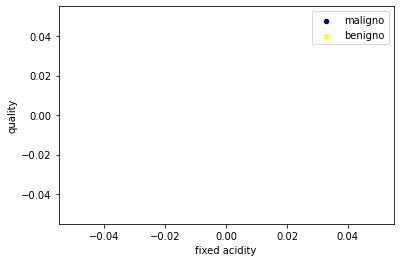

In [68]:
ax = df5[df5['fixed acidity'] == 4][0:50].plot(kind='scatter', x='fixed acidity', y='quality', color='DarkBlue', label='maligno');
df5[df5['fixed acidity'] == 2][0:50].plot(kind='scatter', x='fixed acidity', y='quality', color='Yellow', label='benigno', ax=ax);
plt.show()

## Pre-procesamiento de los Datos

In [69]:
df5.dtypes

fixed acidity             float64
volatile acidity          float64
citric acid               float64
residual sugar            float64
chlorides                 float64
free sulfur dioxide       float64
total sulfur dioxide      float64
pH                        float64
sulphates                 float64
alcohol                   float64
quality                     int64
density-kg/m^3            float64
quality classification     object
Red                         int64
White                       int64
dtype: object

Aquí se puede ver que la columna `BareNuc` incluye algunos valores que no son numéricos. Por este motivo se va a proceder a eliminar esas filas. Para hacer esto se usará el método de *pandas* `.to_numeric` con el parámetro `error=coerce` para convertir los valores inválidos como `NaN`. A su vez, se le aplicará el método `.notnull()` para eliminar las filas que contengan un valor `NaN`. Se terminará esta etapa convirtiendo los valores al tipo entero.

In [70]:
df5 = df5[pd.to_numeric(df5['pH'], errors='coerce').notnull()]
df5['pH'] = df5['pH'].astype('int')
df5.dtypes

fixed acidity             float64
volatile acidity          float64
citric acid               float64
residual sugar            float64
chlorides                 float64
free sulfur dioxide       float64
total sulfur dioxide      float64
pH                          int32
sulphates                 float64
alcohol                   float64
quality                     int64
density-kg/m^3            float64
quality classification     object
Red                         int64
White                       int64
dtype: object

Con el atributo `shape` se puede observar que se eliminaron 16 filas, es decir se pasó de 699 filas a 683 filas.

In [71]:
print('Forma: ', df5.shape)

Forma:  (6497, 15)


Ahora, ya está todo listo para definir **X5** e **y5** a partir del dataframe ya procesado.

In [72]:
X5 = np.asarray(df5[['fixed acidity', 'volatile acidity', 'residual sugar', 'pH', 'sulphates', 'alcohol', 'quality', 'density-kg/m^3']])
X5[0:5]

array([[7.400e+00, 7.000e-01, 1.900e+00, 3.000e+00, 5.600e-01, 9.400e+00,
        5.000e+00, 9.978e+02],
       [7.800e+00, 8.800e-01, 2.600e+00, 3.000e+00, 6.800e-01, 9.800e+00,
        5.000e+00, 9.968e+02],
       [7.800e+00, 7.600e-01, 2.300e+00, 3.000e+00, 6.500e-01, 9.800e+00,
        5.000e+00, 9.970e+02],
       [1.120e+01, 2.800e-01, 1.900e+00, 3.000e+00, 5.800e-01, 9.800e+00,
        6.000e+00, 9.980e+02],
       [7.400e+00, 7.000e-01, 1.900e+00, 3.000e+00, 5.600e-01, 9.400e+00,
        5.000e+00, 9.978e+02]])

Recordar que el objetivo es crear un modelo que prediga el valor de la clase, es decir, benigno (=2) o maligno (=4). 

In [73]:
y5 = np.asarray(df5['fixed acidity'])
y5 [0:5]

array([ 7.4,  7.8,  7.8, 11.2,  7.4])

## Configuración del Modelo

El siguiente paso es dividir el conjunto de datos en el conjunto de entrenamiento y el conjunto de prueba

In [74]:
X5_entrena, X5_prueba, y5_entrena, y5_prueba = train_test_split(X5, y5, test_size=0.2, random_state=4)
print ('Conjunto de Entrenamiento set:', X5_entrena.shape,  y5_entrena.shape)
print ('Conjunto de Prueba:', X5_prueba.shape,  y5_prueba.shape)

Conjunto de Entrenamiento set: (5197, 8) (5197,)
Conjunto de Prueba: (1300, 8) (1300,)


## Modelado

El algoritmo SVM ofrece una colección de funciones de **kernel** para realizar su procesamiento. Básicamente, el mapeo de datos en un espacio dimensional superior se llama **kernelling**. La función matemática utilizada para la transformación se conoce como **función kernel** y puede ser de diferentes tipos, como por ejemplo:

1. Lineal.
2. Polinomial
3. Función de base radial (RBF).
4. Sigmoide.

Cada una de estas funciones tiene sus características, sus pros y sus contras, sin embargo, no hay una manera fácil de saber qué función funcionará mejor con un conjunto de datos determinado. Generalmente, se eligen diferentes funciones a la vez y se comparan los resultados. En esta oportunidad se usará el kernel RBF (función de base radial) para el desarrollo de esta parte.

Ahora se procederá a importar el módulo `svm` y posteriormente se ajustará el modelo con el conjunto de entrenamiento.

In [75]:
from sklearn import svm

modelo_svm = svm.SVC(kernel='rbf')
modelo_svm.fit(X5_entrena, y5_entrena) 

ValueError: Unknown label type: 'continuous'

## Pronóstico

Una vez entrenado el modelo se puede realizar el pronóstico con el conjunto de datos de prueba.

In [76]:
y5_hat = modelo_svm.predict(X5_prueba)
y5_hat

AttributeError: 'SVC' object has no attribute 'support_vectors_'

## Evaluación

Para el paso de evaluación se va a reutilizar la función `grafica_matrix_confusion` para observar la precisión del modelo generado.

In [77]:
# Calcular matriz de confusión
matriz_confusion = metrics.confusion_matrix(y5_prueba, y5_hat, labels=[2,4])
np.set_printoptions(precision=2)

print (metrics.classification_report(y5_prueba, y5_hat))

# Grafica matriz de confusión no normalizada
plt.figure()
grafica_matriz_confusion(matriz_confusion, clases=['Benigno(2)','Maligno(4)'],normalizar= False,  titulo='Matriz de Confusión')



NameError: name 'y5_hat' is not defined

También se puede usar fácilmente el **Valor de F1** de la biblioteca `sklearn`.


In [ ]:
metrics.f1_score(y5_prueba, y5_hat, average='weighted') 

Por otro lado, además se puede probar el **índice de Jaccard** para medir la precisión.

In [ ]:
metrics.jaccard_score(y5_prueba, y5_hat, pos_label=2)

Por último, se construirá un nuevo modelo SVM para el mismo conjunto de datos, pero esta vez, se usará un valor diferente de kernel, por ejemplo el lineal. Para ello, se puede usar el parámetro `kernel='linear'` cuando de define el módelo SVM. ¿Cómo cambia la precisión con la nueva función del kernel?

In [ ]:
modelo_svm_2 = svm.SVC(kernel='poly')
modelo_svm_2.fit(X5_entrena, y5_entrena) 
y5_hat_2 = modelo_svm_2.predict(X5_prueba)
print("Índice de Jaccard: %.4f" % metrics.jaccard_score(y5_prueba, y5_hat_2, pos_label=2))
print("Valor de F1 promedio: %.4f" % metrics.f1_score(y5_prueba, y5_hat_2, average='weighted'))
